# Decision Trees Learning Activity
This notebook implements decision trees.  It uses the Parkinsons dataset from the UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Parkinsons

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Data

In [2]:
# load parkinsons dataset
data = pd.read_csv('parkinsons.data')
data.drop(['name'], axis=1, inplace=True)
y = data['status']
X = data.drop(['status'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
# Changing the test size will change the model. 

## Original Tree

In [59]:
orig_tree_clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [60]:
print('Depth of the classification tree: ', orig_tree_clf.get_depth())

Depth of the classification tree:  6


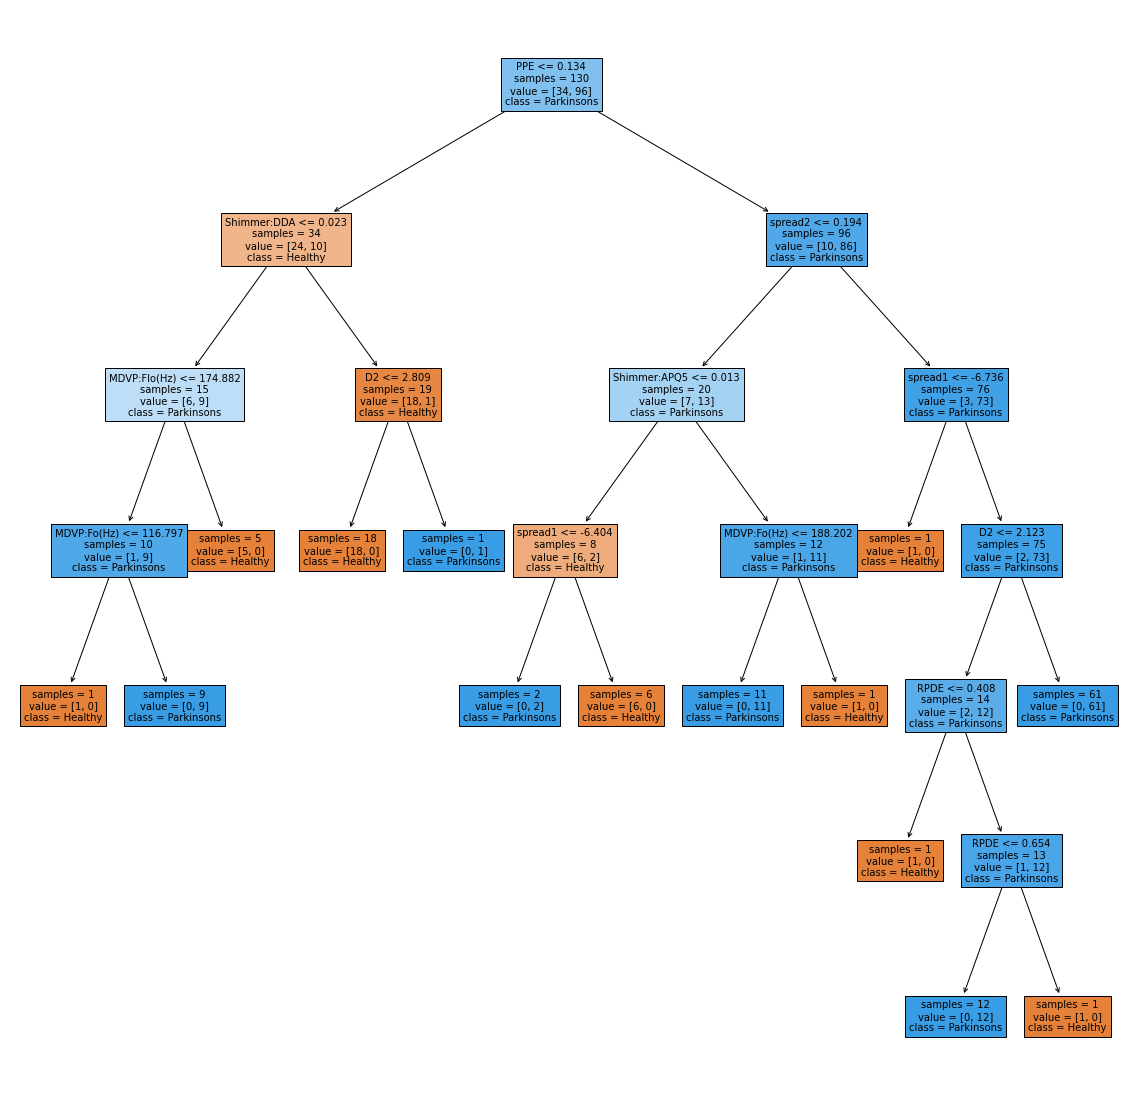

In [61]:
# display the tree
fig, ax = plt.subplots(figsize=(20,20))
tree.plot_tree(orig_tree_clf, 
               feature_names = X_test.columns, 
               class_names = ['Healthy', 'Parkinsons'],
               filled = True,
               fontsize = 10,
               impurity = False,
               ax=ax);

In [62]:
tree_accuracy = accuracy_score(y_test, orig_tree_clf.predict(X_test))
print('Classification accuracy: ', tree_accuracy)

Classification accuracy:  0.9076923076923077


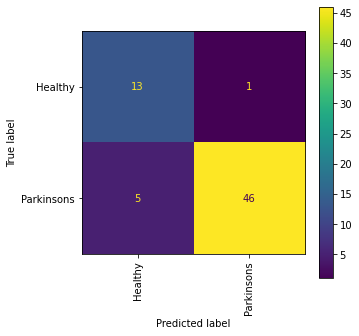

In [63]:
# confusion matrix
y_pred = orig_tree_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Healthy', 'Parkinsons'])
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax, xticks_rotation='vertical')

Text(0.5, 1.0, 'Feature Importance')

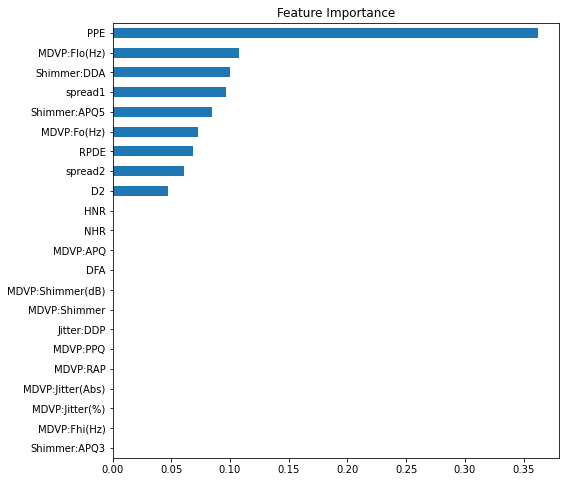

In [64]:
tree_importances = pd.Series(orig_tree_clf.feature_importances_, index=X.columns)
fig, ax = plt.subplots(figsize=(8,8))
tree_importances.sort_values().plot.barh(ax=ax)
ax.set_title('Feature Importance')

## Learning Activity 1

Change the data removed from the training set and observe the response of the tree.

In [65]:
# change number
N_remove = 10
idx_remove = np.random.randint(0, X_train.shape[0], N_remove)

X_mod = X_train.drop(idx_remove).reset_index(drop=True)
y_mod = y_train.drop(idx_remove).reset_index(drop=True)

In [66]:
#If I lower the n_remove number, more depth of the classification tree

In [67]:
tree_clf = tree.DecisionTreeClassifier(random_state=0).fit(X_mod, y_mod)

In [68]:
print('Depth of the classification tree: ', tree_clf.get_depth())

Depth of the classification tree:  6


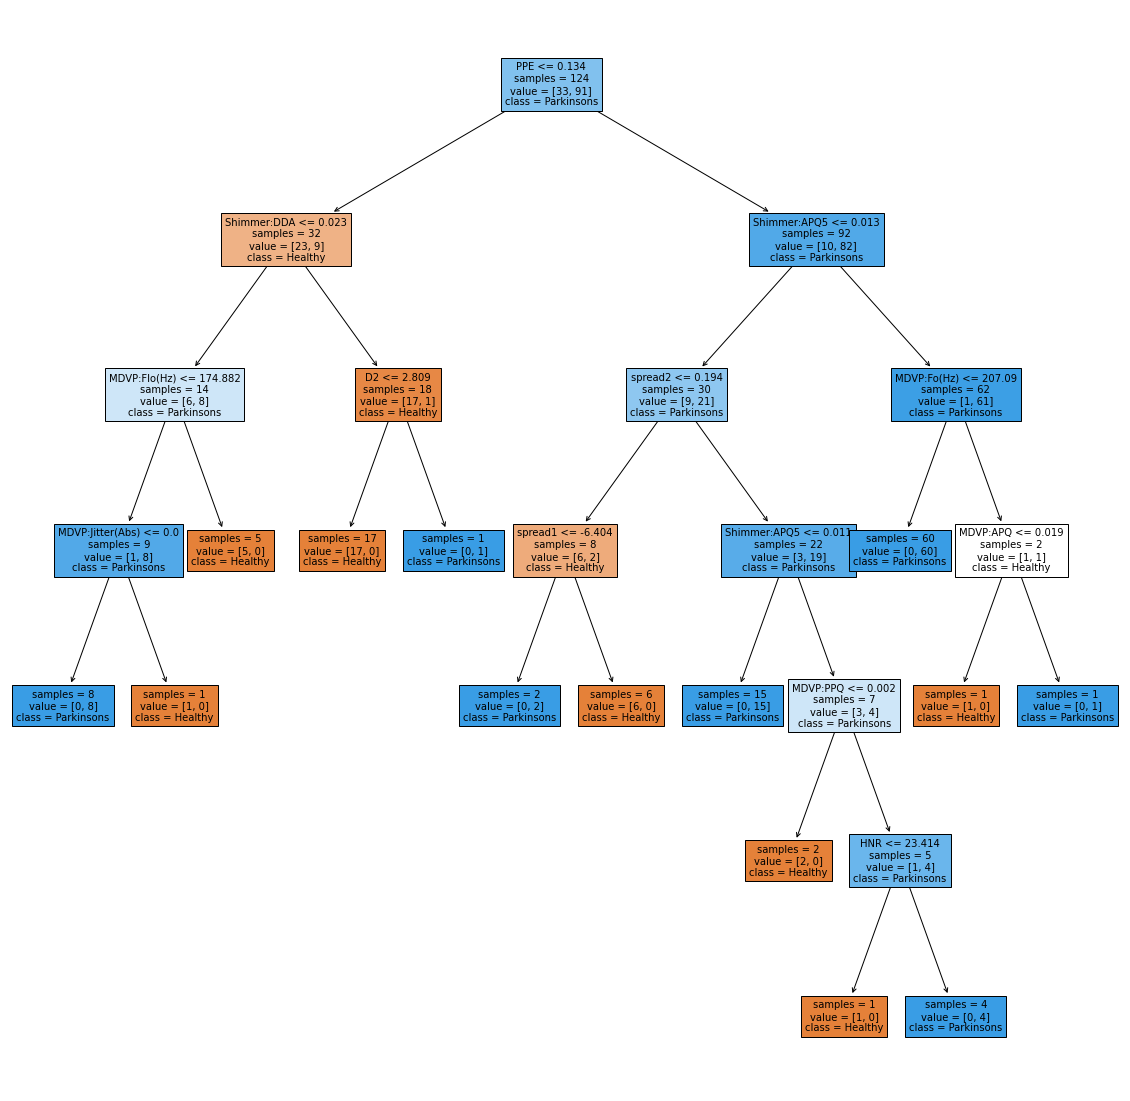

In [43]:
# display the tree
fig, ax = plt.subplots(figsize=(20,20))
tree.plot_tree(tree_clf, 
               feature_names = X_test.columns, 
               class_names = ['Healthy', 'Parkinsons'],
               filled = True,
               fontsize = 10,
               impurity = False,
               ax=ax);

Evaluate on test set

In [ ]:
#White nodes -> ran out of colors? 

In [69]:
tree_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))
print('Classification accuracy: ', tree_accuracy)

Classification accuracy:  0.9076923076923077


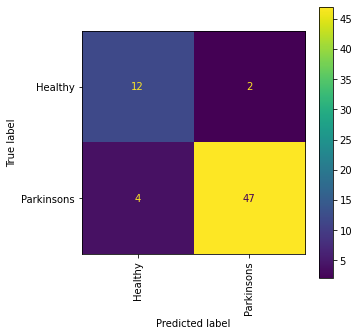

In [70]:
# confusion matrix
y_pred = tree_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Healthy', 'Parkinsons'])
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax, xticks_rotation='vertical')

Feature Importance

Text(0.5, 1.0, 'Feature Importance')

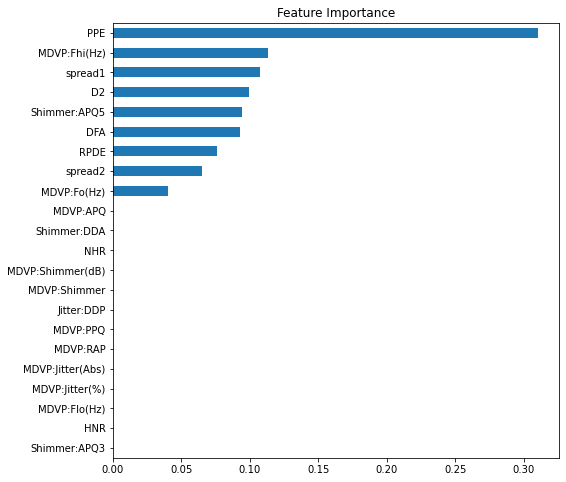

In [71]:
tree_importances = pd.Series(tree_clf.feature_importances_, index=X.columns)
fig, ax = plt.subplots(figsize=(8,8))
tree_importances.sort_values().plot.barh(ax=ax)
ax.set_title('Feature Importance')

## Learning Activity 2

Prune the tree using different values and observe the results

In [72]:
alphas = tree.DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train, y_train)

In [73]:
alphas

{'ccp_alphas': array([0.        , 0.00998291, 0.01384615, 0.01410256, 0.01438327,
        0.0145749 , 0.02307692, 0.02815452, 0.04008812, 0.13985439]),
 'impurities': array([0.        , 0.02994872, 0.04379487, 0.05789744, 0.0722807 ,
        0.0868556 , 0.10993252, 0.16624157, 0.2464178 , 0.38627219])}

In [74]:
pruned_tree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alphas['ccp_alphas'][3]).fit(X_train, y_train)

In [75]:
# If I change the [3] to a higher number, less node classifications.

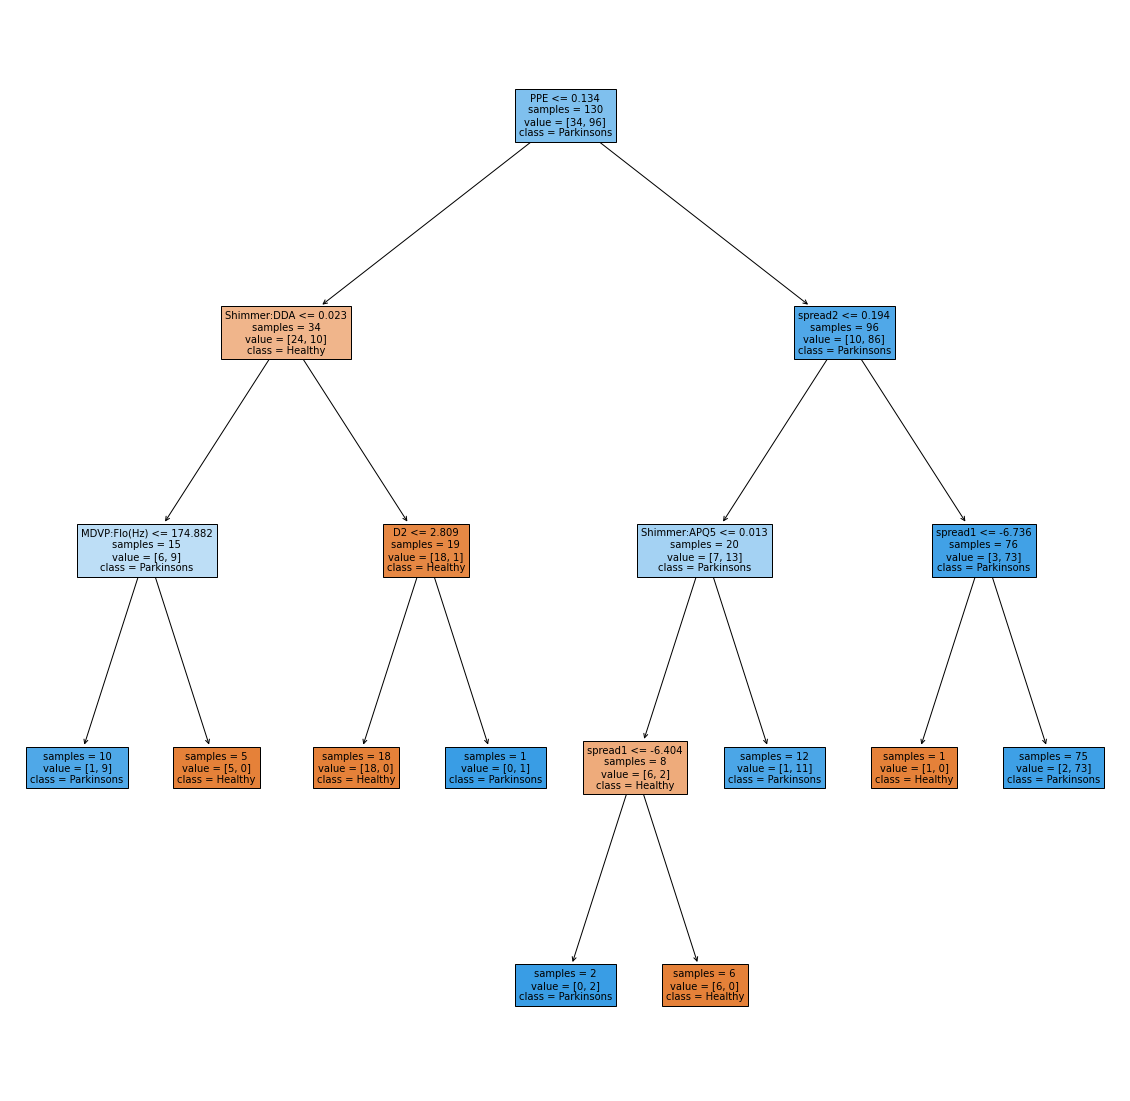

In [76]:
# display pruned tree
fig, ax = plt.subplots(figsize=(20,20))
tree.plot_tree(pruned_tree, 
               feature_names = X_test.columns, 
               class_names = ['Healthy', 'Parkinsons'],
               filled = True,
               fontsize = 10,
               impurity = False,
               ax=ax);

In [77]:
pruned_accuracy = accuracy_score(y_test, pruned_tree.predict(X_test))
print('Classification accuracy: ', pruned_accuracy)

Classification accuracy:  0.9076923076923077


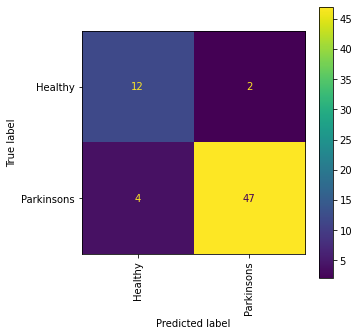

In [52]:
# confusion matrix
y_pred = pruned_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Healthy', 'Parkinsons'])
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax, xticks_rotation='vertical')

## Learning Activity 3

Rerun with different train/test splits and observe the response.

In [ ]:
# The number of splits, depths and structures of trees change. 
# You wouldn't want overfitting. Shallow trees can have accurate model